In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Размер данных до очистки: (11017, 35)
Удалено строк: 1230
Размер данных после очистки: (9787, 35)

Диапазон RiskScore после очистки:
Минимум: 14.84
Максимум: 97.60

1. ГРАФИК РАСПРЕДЕЛЕНИЯ RiskScore


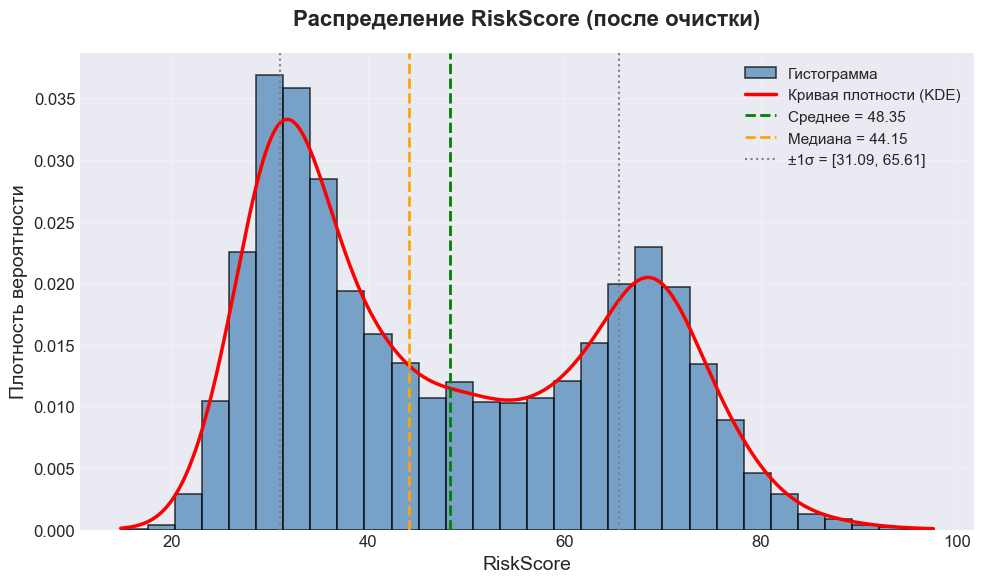


Статистики распределения RiskScore:
Среднее значение: 48.35
Медиана: 44.15
Дисперсия: 17.26
Коэффициент вариации: 35.69%
Асимметрия (skewness): 0.332
Эксцесс (kurtosis): -1.260

2. МАТРИЦА КОРРЕЛЯЦИИ ВСЕХ ПАРАМЕТРОВ

Матрица корреляции (числовые признаки):
Размер матрицы: 29x29

Первые 10 строк и столбцов матрицы корреляции:
                                Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  NumberOfOpenCreditLines  NumberOfCreditInquiries
Age                        1.000000      0.039471     0.056968    0.006178      0.019498            0.018494            -0.013430                   0.026346                -0.003938                -0.001098
AnnualIncome               0.039471      1.000000     0.617930    0.002974     -0.017199           -0.004079             0.010828                  -0.009095                 0.003477                 0.014758
CreditScore                0.056968      0.617930  

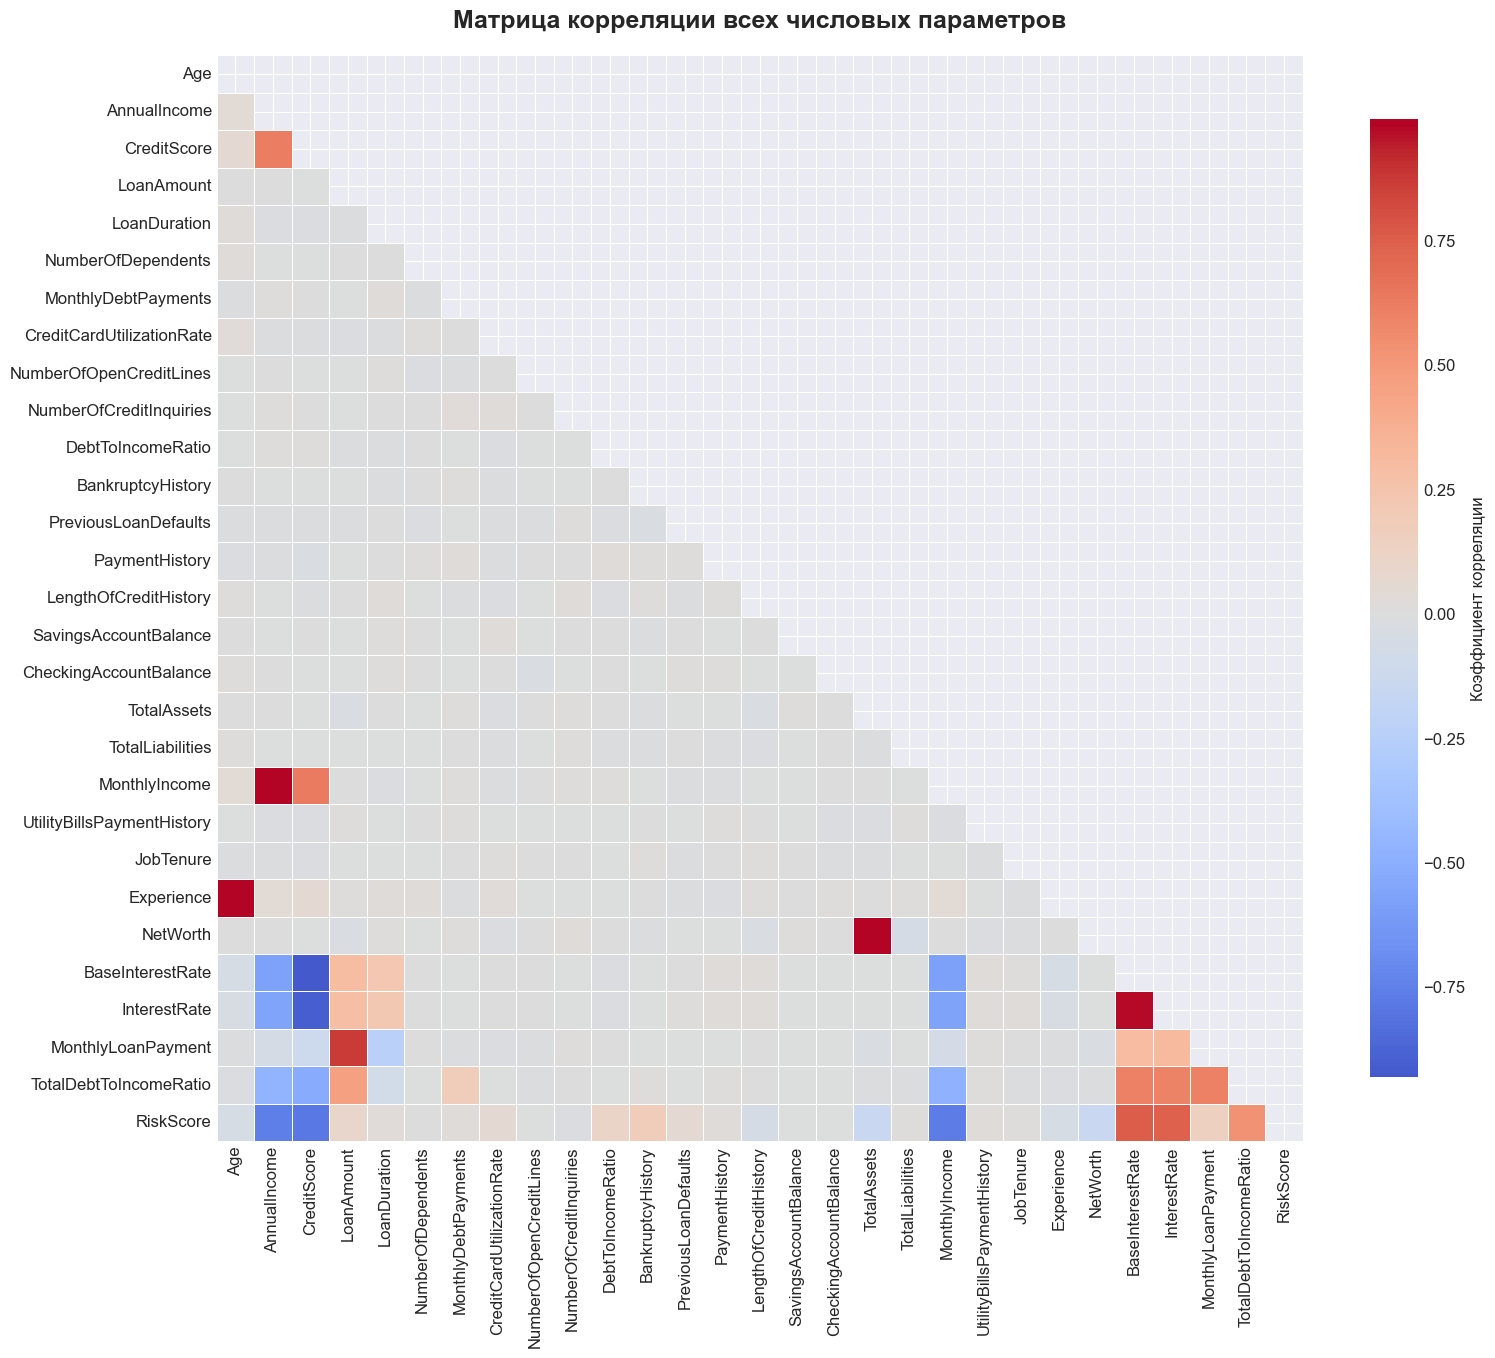


Топ-15 признаков с наибольшей положительной корреляцией с RiskScore:
 2. BaseInterestRate               :  0.7587
 3. InterestRate                   :  0.7429
 4. TotalDebtToIncomeRatio         :  0.5324
 5. BankruptcyHistory              :  0.1776
 6. MonthlyLoanPayment             :  0.1515
 7. DebtToIncomeRatio              :  0.1108
 8. LoanAmount                     :  0.0850
 9. CreditCardUtilizationRate      :  0.0553
10. PreviousLoanDefaults           :  0.0545
11. LoanDuration                   :  0.0249
12. UtilityBillsPaymentHistory     :  0.0221
13. MonthlyDebtPayments            :  0.0184
14. PaymentHistory                 :  0.0176
15. TotalLiabilities               :  0.0160
16. JobTenure                      :  0.0126


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Загружаем данные
df = pd.read_csv('train.csv')

print(f"Размер данных до очистки: {df.shape}")

# Удаляем строки, где RiskScore < 0 или > 100
# Используем логическое условие без циклов
mask = (df['RiskScore'] >= 0) & (df['RiskScore'] <= 100)
df_cleaned_tmp = df[mask].copy()
df_cleaned = df_cleaned_tmp.dropna()

print(f"Удалено строк: {len(df) - len(df_cleaned)}")
print(f"Размер данных после очистки: {df_cleaned.shape}")

# Проверяем диапазон значений
print(f"\nДиапазон RiskScore после очистки:")
print(f"Минимум: {df_cleaned['RiskScore'].min():.2f}")
print(f"Максимум: {df_cleaned['RiskScore'].max():.2f}")

# 1) График распределения RiskScore
print("\n" + "="*50)
print("1. ГРАФИК РАСПРЕДЕЛЕНИЯ RiskScore")
print("="*50)

plt.figure(figsize=(10, 6))

# Гистограмма с кривой плотности
n, bins, patches = plt.hist(df_cleaned['RiskScore'], bins=30, alpha=0.7,
                           edgecolor='black', linewidth=1.2, density=True,
                           color='steelblue', label='Гистограмма')

# Кривая плотности (KDE)
from scipy.stats import gaussian_kde
kde = gaussian_kde(df_cleaned['RiskScore'])
x_vals = np.linspace(df_cleaned['RiskScore'].min(), df_cleaned['RiskScore'].max(), 1000)
plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2.5, label='Кривая плотности (KDE)')

# Вертикальные линии для статистик
mean_val = df_cleaned['RiskScore'].mean()
median_val = df_cleaned['RiskScore'].median()
std_val = df_cleaned['RiskScore'].std()

plt.axvline(mean_val, color='green', linestyle='--', linewidth=2,
           label=f'Среднее = {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2,
           label=f'Медиана = {median_val:.2f}')
plt.axvline(mean_val + std_val, color='gray', linestyle=':', linewidth=1.5)
plt.axvline(mean_val - std_val, color='gray', linestyle=':', linewidth=1.5,
           label=f'±1σ = [{mean_val-std_val:.2f}, {mean_val+std_val:.2f}]')

# Настройки графика
plt.title('Распределение RiskScore (после очистки)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('RiskScore', fontsize=14)
plt.ylabel('Плотность вероятности', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()

# Выводим статистики
print("\nСтатистики распределения RiskScore:")
print(f"Среднее значение: {mean_val:.2f}")
print(f"Медиана: {median_val:.2f}")
print(f"Дисперсия: {std_val:.2f}")
print(f"Коэффициент вариации: {(std_val/mean_val*100):.2f}%")
print(f"Асимметрия (skewness): {df_cleaned['RiskScore'].skew():.3f}")
print(f"Эксцесс (kurtosis): {df_cleaned['RiskScore'].kurtosis():.3f}")

# 2) Матрица корреляции всех параметров друг от друга
print("\n" + "="*50)
print("2. МАТРИЦА КОРРЕЛЯЦИИ ВСЕХ ПАРАМЕТРОВ")
print("="*50)

# Вычисляем матрицу корреляции для числовых столбцов
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
corr_matrix = df_cleaned[numeric_cols].corr()

# Выводим матрицу корреляции
print("\nМатрица корреляции (числовые признаки):")
print(f"Размер матрицы: {corr_matrix.shape[0]}x{corr_matrix.shape[1]}")
print("\nПервые 10 строк и столбцов матрицы корреляции:")
print(corr_matrix.iloc[:10, :10].to_string())

# Создаем тепловую карту корреляций
plt.figure(figsize=(16, 14))

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Тепловая карта
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=False, fmt='.2f',
                     cmap='coolwarm', center=0, square=True,
                     linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Коэффициент корреляции"})

plt.title('Матрица корреляции всех числовых параметров', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Корреляции с целевой переменной
risk_correlations = corr_matrix['RiskScore'].sort_values(ascending=False)

print("\nТоп-15 признаков с наибольшей положительной корреляцией с RiskScore:")
for i, (feature, corr) in enumerate(risk_correlations.head(16).items(), 1):
    if feature != 'RiskScore':  # Пропускаем сам RiskScore
        print(f"{i:2}. {feature:30} : {corr:7.4f}")


# Сохраняем матрицу корреляции в файл
# corr_matrix.to_csv('correlation_matrix.csv')
# print(f"\n✓ Матрица корреляции сохранена в файл 'correlation_matrix.csv'")

# Сохраняем очищенные данные
# df_cleaned.to_csv('train_cleaned_range.csv', index=False)
# print(f"✓ Очищенные данные сохранены в 'train_cleaned_range.csv'")

In [30]:
# ФУНКЦИИ НОРМАЛИЗАЦИИ ДАННЫХ


def z_score_normalization_with_params(df, columns, train_params=None):
    """
    Нормализация методом z-score (стандартизация)
    Если train_params=None - вычисляет параметры из df
    Если train_params заданы - использует их для нормализации

    Parameters:
    -----------
    df : DataFrame
        Данные для нормализации
    columns : list
        Список столбцов для нормализации
    train_params : dict или None
        Параметры нормализации (mean, std) с тренировочных данных

    Returns:
    --------
    df_normalized : DataFrame
        Нормализованные данные
    params : dict
        Параметры нормализации (mean, std)
    """
    df_normalized = df.copy()
    params = {}

    for col in columns:
        if col in df.columns:
            if train_params is None:
                # Вычисляем параметры из данных
                mean_val = df[col].mean()
                std_val = df[col].std()
                params[col] = {'mean': mean_val, 'std': std_val}
            else:
                # Используем параметры с тренировочных данных
                mean_val = train_params[col]['mean']
                std_val = train_params[col]['std']

            if std_val != 0:  # Избегаем деления на ноль
                df_normalized[col] = (df[col] - mean_val) / std_val
            else:
                df_normalized[col] = 0

    return df_normalized, params

def min_max_normalization_with_params(df, columns, feature_range=(0, 1), train_params=None):
    """
    Нормализация методом min-max (масштабирование)

    Parameters:
    -----------
    df : DataFrame
        Данные для нормализации
    columns : list
        Список столбцов для нормализации
    feature_range : tuple
        Диапазон значений (min, max)
    train_params : dict или None
        Параметры нормализации (min, max) с тренировочных данных

    Returns:
    --------
    df_normalized : DataFrame
        Нормализованные данные
    params : dict
        Параметры нормализации (min, max)
    """
    df_normalized = df.copy()
    min_val, max_val = feature_range
    params = {}

    for col in columns:
        if col in df.columns:
            if train_params is None:
                # Вычисляем параметры из данных
                col_min = df[col].min()
                col_max = df[col].max()
                params[col] = {'min': col_min, 'max': col_max}
            else:
                # Используем параметры с тренировочных данных
                col_min = train_params[col]['min']
                col_max = train_params[col]['max']

            col_range = col_max - col_min

            if col_range != 0:  # Избегаем деления на ноль
                df_normalized[col] = min_val + (max_val - min_val) * (df[col] - col_min) / col_range
            else:
                df_normalized[col] = min_val

    return df_normalized, params

# Признаки для нормализации (из вашего списка)
# Признаки для нормализации
features_to_normalize = [
    'BaseInterestRate',
    'InterestRate',
    'TotalDebtToIncomeRatio',
    'BankruptcyHistory',
    'MonthlyLoanPayment',
    'DebtToIncomeRatio',
    'LoanAmount',
    'CreditCardUtilizationRate',
    'PreviousLoanDefaults',
    'LoanDuration',
    'UtilityBillsPaymentHistory',
    'MonthlyDebtPayments',
    'PaymentHistory',
    'TotalLiabilities',
    'JobTenure'
]

print("\n" + "="*50)
print("НОРМАЛИЗАЦИЯ ДАННЫХ: ТРЕНИРОВОЧНЫЕ И ТЕСТОВЫЕ")
print("="*50)

# 1. Нормализация тренировочных данных и сохранение параметров
print("\n1. НОРМАЛИЗАЦИЯ ТРЕНИРОВОЧНЫХ ДАННЫХ:")

# Z-score нормализация тренировочных данных
df_zscore_train, zscore_params = z_score_normalization_with_params(df_cleaned, features_to_normalize)
print(f"✓ Z-score нормализация: параметры сохранены для {len(zscore_params)} признаков")

# Проверка z-score нормализации
print("\n   Проверка Z-score нормализации (первые 3 признака):")
for feature in features_to_normalize[:3]:
    if feature in df_zscore_train.columns:
        mean_val = df_zscore_train[feature].mean()
        std_val = df_zscore_train[feature].std()
        print(f"   {feature:25}: mean = {mean_val:.6f}, std = {std_val:.6f}")

# Min-max нормализация тренировочных данных
df_minmax_train, minmax_params = min_max_normalization_with_params(df_cleaned, features_to_normalize)
print(f"\n✓ Min-max нормализация: параметры сохранены для {len(minmax_params)} признаков")

# Проверка min-max нормализации
print("\n   Проверка Min-max нормализации (первые 3 признака):")
for feature in features_to_normalize[:3]:
    if feature in df_minmax_train.columns:
        min_val = df_minmax_train[feature].min()
        max_val = df_minmax_train[feature].max()
        print(f"   {feature:25}: min = {min_val:.6f}, max = {max_val:.6f}")

# 2. Нормализация тестовых данных с использованием параметров с тренировочных данных
print("\n" + "="*50)
print("2. НОРМАЛИЗАЦИЯ ТЕСТОВЫХ ДАННЫХ:")

test_df = pd.read_csv('test.csv')

if test_df is not None:
    # 2.1. Z-score нормализация тестовых данных
    print("\n   Z-score нормализация тестовых данных:")
    df_zscore_test, _ = z_score_normalization_with_params(
        test_df,
        features_to_normalize,
        train_params=zscore_params
    )

    # Проверка z-score нормализации тестовых данных
    print("\n   Проверка Z-score нормализации тестовых данных:")
    for feature in features_to_normalize[:3]:
        if feature in df_zscore_test.columns:
            mean_val = df_zscore_test[feature].mean()
            std_val = df_zscore_test[feature].std()
            print(f"   {feature:25}: mean = {mean_val:.6f}, std = {std_val:.6f}")

    # 2.2. Min-max нормализация тестовых данных
    print("\n   Min-max нормализация тестовых данных:")
    df_minmax_test, _ = min_max_normalization_with_params(
        test_df,
        features_to_normalize,
        train_params=minmax_params
    )

    # Проверка min-max нормализации тестовых данных
    print("\n   Проверка Min-max нормализации тестовых данных:")
    for feature in features_to_normalize[:3]:
        if feature in df_minmax_test.columns:
            min_val = df_minmax_test[feature].min()
            max_val = df_minmax_test[feature].max()
            print(f"   {feature:25}: min = {min_val:.6f}, max = {max_val:.6f}")

    # 2.3. Сравнение статистик тренировочных и тестовых данных
    print("\n" + "="*50)
    print("3. СРАВНЕНИЕ ТРЕНИРОВОЧНЫХ И ТЕСТОВЫХ ДАННЫХ ПОСЛЕ НОРМАЛИЗАЦИИ")
    print("="*50)

    print("\nZ-score нормализация - сравнение статистик:")
    comparison_zscore = []
    for feature in features_to_normalize[:5]:  # Первые 5 признаков
        if feature in df_zscore_train.columns and feature in df_zscore_test.columns:
            train_mean = df_zscore_train[feature].mean()
            train_std = df_zscore_train[feature].std()
            test_mean = df_zscore_test[feature].mean()
            test_std = df_zscore_test[feature].std()

            comparison_zscore.append({
                'Признак': feature,
                'Train mean': f"{train_mean:.4f}",
                'Test mean': f"{test_mean:.4f}",
                'Train std': f"{train_std:.4f}",
                'Test std': f"{test_std:.4f}",
                'Разница mean': f"{abs(train_mean - test_mean):.4f}"
            })

    if comparison_zscore:
        df_comparison_zscore = pd.DataFrame(comparison_zscore)
        print(df_comparison_zscore.to_string(index=False))

    print("\nMin-max нормализация - сравнение статистик:")
    comparison_minmax = []
    for feature in features_to_normalize[:5]:  # Первые 5 признаков
        if feature in df_minmax_train.columns and feature in df_minmax_test.columns:
            train_min = df_minmax_train[feature].min()
            train_max = df_minmax_train[feature].max()
            test_min = df_minmax_test[feature].min()
            test_max = df_minmax_test[feature].max()

            comparison_minmax.append({
                'Признак': feature,
                'Train min': f"{train_min:.4f}",
                'Test min': f"{test_min:.4f}",
                'Train max': f"{train_max:.4f}",
                'Test max': f"{test_max:.4f}"
            })

    if comparison_minmax:
        df_comparison_minmax = pd.DataFrame(comparison_minmax)
        print(df_comparison_minmax.to_string(index=False))

    # 2.4. Проверка корректности нормализации
    print("\n" + "="*50)
    print("4. ПРОВЕРКА КОРРЕКТНОСТИ НОРМАЛИЗАЦИИ")
    print("="*50)

    print("\nПроверка распределения после Z-score нормализации:")
    zscore_checks = []
    for feature in features_to_normalize[:3]:
        if feature in df_zscore_train.columns and feature in df_zscore_test.columns:
            # Проверяем, что среднее близко к 0, std близко к 1
            train_mean = df_zscore_train[feature].mean()
            train_std = df_zscore_train[feature].std()

            is_train_ok = abs(train_mean) < 0.1 and 0.9 < train_std < 1.1

            zscore_checks.append({
                'Признак': feature,
                'Train mean': f"{train_mean:.4f}",
                'Train std': f"{train_std:.4f}",
                'Train OK': '✓' if is_train_ok else '✗'
            })

    if zscore_checks:
        df_zscore_checks = pd.DataFrame(zscore_checks)
        print(df_zscore_checks.to_string(index=False))

    print("\nПроверка распределения после Min-max нормализации:")
    minmax_checks = []
    for feature in features_to_normalize[:3]:
        if feature in df_minmax_train.columns and feature in df_minmax_test.columns:
            # Проверяем, что значения в диапазоне [0, 1]
            train_min = df_minmax_train[feature].min()
            train_max = df_minmax_train[feature].max()
            test_min = df_minmax_test[feature].min()
            test_max = df_minmax_test[feature].max()

            is_train_ok = 0 <= train_min <= train_max <= 1
            is_test_ok = 0 <= test_min <= test_max <= 1

            minmax_checks.append({
                'Признак': feature,
                'Train min': f"{train_min:.4f}",
                'Train max': f"{train_max:.4f}",
                'Train OK': '✓' if is_train_ok else '✗',
                'Test min': f"{test_min:.4f}",
                'Test max': f"{test_max:.4f}",
                'Test OK': '✓' if is_test_ok else '✗'
            })

    if minmax_checks:
        df_minmax_checks = pd.DataFrame(minmax_checks)
        print(df_minmax_checks.to_string(index=False))


    # Сохраняем тренировочные данные
    # df_zscore_train.to_csv('train_zscore_normalized.csv', index=False)
    # df_minmax_train.to_csv('train_minmax_normalized.csv', index=False)

    # Сохраняем тестовые данные
    # df_zscore_test.to_csv('test_zscore_normalized.csv', index=False)
    # df_minmax_test.to_csv('test_minmax_normalized.csv', index=False)

    # 2.6. Сводка по нормализации
    print("\n" + "="*50)
    print("СВОДКА ПО НОРМАЛИЗАЦИИ ДАННЫХ")
    print("="*50)

    print(f"\nТренировочные данные:")
    print(f"  - Исходный размер: {df_cleaned.shape}")
    print(f"  - После Z-score: {df_zscore_train.shape}")
    print(f"  - После Min-max: {df_minmax_train.shape}")

    print(f"\nТестовые данные:")
    print(f"  - Исходный размер: {test_df.shape}")
    print(f"  - После Z-score: {df_zscore_test.shape}")
    print(f"  - После Min-max: {df_minmax_test.shape}")

    print(f"\nПризнаки нормализованы: {len(features_to_normalize)}")
    print("Используемые признаки:")
    for i, feature in enumerate(features_to_normalize, 1):
        print(f"  {i:2}. {feature}")


else:
    print("✗ Тестовые данные недоступны, нормализация только тренировочных данных")

    # Сохраняем только тренировочные данные
    # df_zscore_train.to_csv('train_zscore_normalized.csv', index=False)
    # df_minmax_train.to_csv('train_minmax_normalized.csv', index=False)




НОРМАЛИЗАЦИЯ ДАННЫХ: ТРЕНИРОВОЧНЫЕ И ТЕСТОВЫЕ

1. НОРМАЛИЗАЦИЯ ТРЕНИРОВОЧНЫХ ДАННЫХ:
✓ Z-score нормализация: параметры сохранены для 15 признаков

   Проверка Z-score нормализации (первые 3 признака):
   BaseInterestRate         : mean = -0.000000, std = 1.000000
   InterestRate             : mean = -0.000000, std = 1.000000
   TotalDebtToIncomeRatio   : mean = 0.000000, std = 1.000000

✓ Min-max нормализация: параметры сохранены для 15 признаков

   Проверка Min-max нормализации (первые 3 признака):
   BaseInterestRate         : min = 0.000000, max = 1.000000
   InterestRate             : min = 0.000000, max = 1.000000
   TotalDebtToIncomeRatio   : min = 0.000000, max = 1.000000

2. НОРМАЛИЗАЦИЯ ТЕСТОВЫХ ДАННЫХ:

   Z-score нормализация тестовых данных:

   Проверка Z-score нормализации тестовых данных:
   BaseInterestRate         : mean = 0.003018, std = 1.013101
   InterestRate             : mean = 0.004697, std = 1.017394
   TotalDebtToIncomeRatio   : mean = 0.004707, std = 1.0530


2. НОРМАЛИЗАЦИЯ ДАННЫХ

Нормализация тренировочных данных:
✓ Z-score нормализация тренировочных данных

Нормализация тестовых данных:
✓ Z-score нормализация тестовых данных

3. ОБУЧЕНИЕ МОДЕЛИ
Обучение модели линейной регрессии (аналитический метод)...
Размер тренировочной выборки: (9787, 15)
Метод обучения: stochastic
MSE на тренировочной выборке: 94.7744
R² на тренировочной выборке: 0.6817

Топ-5 важнейших признаков:
  1. BaseInterestRate               :  64.646794
  2. InterestRate                   :  40.641469
  3. LoanAmount                     : -32.974792
  4. TotalDebtToIncomeRatio         :  28.211141
  5. MonthlyLoanPayment             : -19.474668
Функция потерь на последней итерации: 94.785478
Количество итераций: 1000

✓ Модель успешно обучена
  Train MSE: 94.7744
  Train R²: 0.6817

4. СОЗДАНИЕ ПРЕДСКАЗАНИЙ ДЛЯ ТЕСТОВЫХ ДАННЫХ

Создание предсказаний...

5. СОХРАНЕНИЕ ПРЕДСКАЗАНИЙ В ФАЙЛ

Первые 5 строк файла:
 ID  RiskScore
  0  36.187117
  1  52.280752
  2  37.164094
 

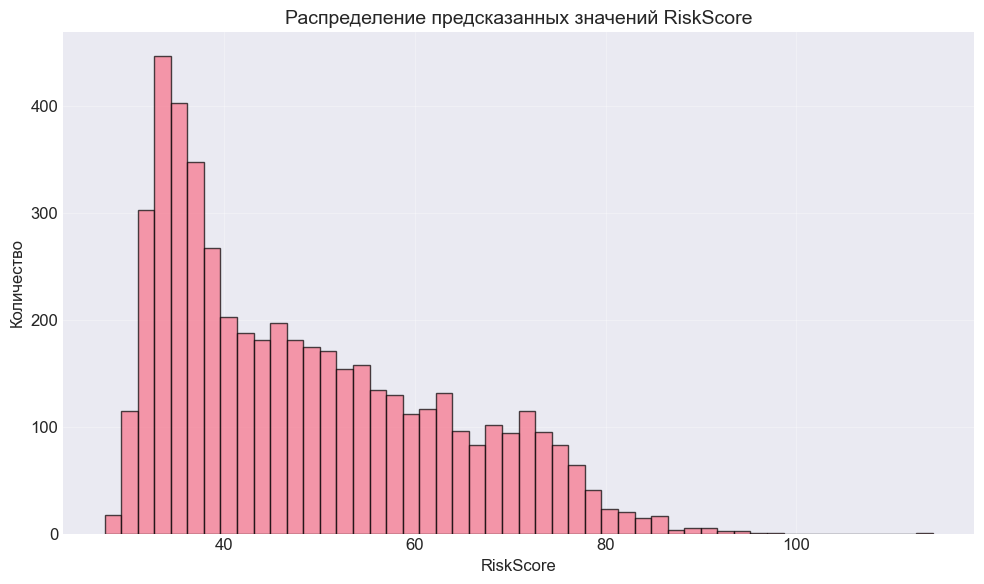


Сводная статистика предсказаний:
count    5000.000000
mean       48.378643
std        14.267950
min        27.490976
25%        36.036606
50%        45.115946
75%        58.398307
max       114.265781


In [34]:
import numpy as np
import pandas as pd

class LinearRegression:
    def __init__(self, method='analytical', learning_rate=0.001, n_iter=1000,  # Уменьшили learning_rate
                 batch_size=32, random_state=42, verbose=False):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.random_state = random_state
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _initialize_weights(self, n_features):
        """Инициализация весов с учетом метода обучения"""
        if self.method == 'analytical':
            # Для аналитического метода инициализация не критична
            self.weights = np.random.randn(n_features, 1) * 0.01
        else:
            # Для градиентных методов используем Xavier/Glorot инициализацию
            limit = np.sqrt(6 / (n_features + 1))
            self.weights = np.random.uniform(-limit, limit, (n_features, 1))

    def _add_intercept(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        X_with_intercept = self._add_intercept(X)
        n_samples, n_features = X_with_intercept.shape

        np.random.seed(self.random_state)
        self._initialize_weights(n_features)

        if self.method == 'analytical':
            self._fit_analytical(X_with_intercept, y)
        elif self.method == 'gradient':
            self._fit_gradient_descent(X_with_intercept, y)
        elif self.method == 'stochastic':
            self._fit_stochastic_gradient_descent(X_with_intercept, y)

        # Извлекаем скалярное значение для bias
        self.bias = float(self.weights[0])
        self.weights = self.weights[1:]

        return self

    def _fit_analytical(self, X, y):
        try:
            # Добавляем регуляризацию для устойчивости
            lambda_reg = 1e-6
            self.weights = np.linalg.inv(X.T @ X + lambda_reg * np.eye(X.shape[1])) @ X.T @ y
        except np.linalg.LinAlgError:
            # Используем псевдообратную матрицу
            self.weights = np.linalg.pinv(X) @ y

    def _fit_gradient_descent(self, X, y):
        n_samples = X.shape[0]

        for i in range(self.n_iter):
            # Прямой проход
            y_pred = X @ self.weights

            # Проверка на nan
            if np.any(np.isnan(y_pred)):
                if self.verbose:
                    print(f"Итерация {i}: обнаружены nan в предсказаниях")
                break

            # Вычисление ошибки
            error = y_pred - y

            # Вычисление градиента
            gradient = (2 / n_samples) * (X.T @ error)

            # Проверка градиента на nan
            if np.any(np.isnan(gradient)):
                if self.verbose:
                    print(f"Итерация {i}: обнаружены nan в градиенте")
                break

            # Обновление весов
            self.weights -= self.learning_rate * gradient

            # Вычисление функции потерь
            loss = np.mean(error ** 2)
            self.loss_history.append(loss)

            # Ранняя остановка
            if i > 10 and abs(self.loss_history[-1] - self.loss_history[-2]) < 1e-8:
                break

            # Вывод прогресса каждые 100 итераций
            if self.verbose and i % 100 == 0:
                print(f"Итерация {i}: Loss = {loss:.6f}")

    def _fit_stochastic_gradient_descent(self, X, y):
        n_samples = X.shape[0]

        for i in range(self.n_iter):
            # Перемешиваем данные
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0
            batch_count = 0

            # Мини-батчи
            for j in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[j:j + self.batch_size]
                y_batch = y_shuffled[j:j + self.batch_size]

                if len(X_batch) == 0:
                    continue

                # Прямой проход
                y_pred = X_batch @ self.weights

                # Вычисление ошибки
                error = y_pred - y_batch

                # Вычисление градиента
                gradient = (2 / len(X_batch)) * (X_batch.T @ error)

                # Проверка градиента на nan
                if np.any(np.isnan(gradient)):
                    if self.verbose:
                        print(f"Итерация {i}, батч {j}: обнаружены nan в градиенте")
                    break

                # Обновление весов
                self.weights -= self.learning_rate * gradient

                # Вычисление потерь для батча
                batch_loss = np.mean(error ** 2)
                epoch_loss += batch_loss
                batch_count += 1

            # Средняя потеря за эпоху
            if batch_count > 0:
                avg_loss = epoch_loss / batch_count
                self.loss_history.append(avg_loss)

            # Ранняя остановка
            if i > 10 and len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < 1e-8:
                break

    def predict(self, X):
        X = np.array(X)
        return (X @ self.weights + self.bias).flatten()

    def get_coefficients(self):
        return {
            'weights': self.weights.flatten(),
            'bias': float(self.bias)  # Преобразуем в скаляр
        }


# ФУНКЦИЯ ДЛЯ ОБУЧЕНИЯ И ТЕСТИРОВАНИЯ МОДЕЛИ

# ФУНКЦИЯ ДЛЯ ОБУЧЕНИЯ МОДЕЛИ

def train_model(train_df, features, target='RiskScore',
                method='analytical', **kwargs):
    """
    Обучает модель линейной регрессии на тренировочных данных

    Parameters:
    -----------
    train_df : DataFrame
        Тренировочные данные
    features : list
        Список признаков для обучения
    target : str
        Целевая переменная
    method : str
        Метод обучения: 'analytical', 'gradient', 'stochastic'
    **kwargs : dict
        Дополнительные параметры для LinearRegression

    Returns:
    --------
    model : LinearRegression
        Обученная модель
    train_metrics : dict
        Метрики на тренировочных данных
    """

    # Проверяем, что все признаки есть в данных
    missing_in_train = [f for f in features if f not in train_df.columns]

    if missing_in_train:
        print(f"⚠️ В тренировочных данных отсутствуют признаки: {missing_in_train}")
        features = [f for f in features if f in train_df.columns]

    # Подготовка данных
    X_train = train_df[features].values
    y_train = train_df[target].values

    print(f"Размер тренировочной выборки: {X_train.shape}")
    print(f"Метод обучения: {method}")

    # Создаем и обучаем модель
    model = LinearRegression(method=method, **kwargs)
    model.fit(X_train, y_train)

    # Предсказания на тренировочных данных
    y_pred_train = model.predict(X_train)

    # Вычисление метрик на тренировочных данных
    train_mse = np.mean((y_train - y_pred_train) ** 2)
    train_r2 = 1 - np.sum((y_train - y_pred_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2)

    print(f"MSE на тренировочной выборке: {train_mse:.4f}")
    print(f"R² на тренировочной выборке: {train_r2:.4f}")

    # Выводим топ-5 коэффициентов по абсолютному значению
    weights = model.weights.flatten()
    top_indices = np.argsort(np.abs(weights))[::-1][:5]

    print("\nТоп-5 важнейших признаков:")
    for i, idx in enumerate(top_indices):
        if idx < len(features):
            feature_name = features[idx]
            weight = weights[idx]
            print(f"  {i+1}. {feature_name:30} : {weight:10.6f}")

    if method != 'analytical' and model.loss_history:
        print(f"Функция потерь на последней итерации: {model.loss_history[-1]:.6f}")
        print(f"Количество итераций: {len(model.loss_history)}")

    train_metrics = {
        'train_mse': train_mse,
        'train_r2': train_r2,
        'coefficients': model.get_coefficients(),
        'loss_history': model.loss_history.copy(),
        'features': features
    }

    return model, train_metrics


# ФУНКЦИЯ ДЛЯ ТЕСТИРОВАНИЯ МОДЕЛИ

def test_model(model, test_df, features, target='RiskScore'):
    """
    Тестирует модель на тестовых данных

    Parameters:
    -----------
    model : LinearRegression
        Обученная модель
    test_df : DataFrame
        Тестовые данные
    features : list
        Список признаков для тестирования
    target : str
        Целевая переменная (опционально, если есть в тестовых данных)

    Returns:
    --------
    test_metrics : dict
        Метрики на тестовых данных (если есть target)
    y_pred : array
        Предсказания для тестовых данных
    """

    # Проверяем, что все признаки есть в тестовых данных
    missing_in_test = [f for f in features if f not in test_df.columns]

    if missing_in_test:
        print(f"⚠️ В тестовых данных отсутствуют признаки: {missing_in_test}")
        features = [f for f in features if f in test_df.columns]

    # Подготовка данных для предсказания
    X_test = test_df[features].values

    print(f"Размер тестовой выборки: {X_test.shape}")

    # Делаем предсказания
    y_pred = model.predict(X_test)

    test_metrics = {}

    # Если в тестовых данных есть целевая переменная, вычисляем метрики
    if target in test_df.columns:
        y_test = test_df[target].values

        # Вычисление метрик
        test_mse = np.mean((y_test - y_pred) ** 2)
        test_r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

        print(f"MSE на тестовой выборке: {test_mse:.4f}")
        print(f"R² на тестовой выборке: {test_r2:.4f}")

        test_metrics = {
            'test_mse': test_mse,
            'test_r2': test_r2
        }
    else:
        print("⚠️ В тестовых данных нет целевой переменной, метрики не вычислены")

    return test_metrics, y_pred


# ФУНКЦИЯ ДЛЯ ПРЕДСКАЗАНИЯ НА ТЕСТОВЫХ ДАННЫХ

def predict_on_test_data(model, test_df, features, id_column='ID',
                         prediction_column='RiskScore'):
    """
    Делает предсказания на тестовых данных и сохраняет в файл

    Parameters:
    -----------
    model : LinearRegression
        Обученная модель
    test_df : DataFrame
        Тестовые данные
    features : list
        Список признаков для предсказания
    id_column : str
        Название столбца с ID
    prediction_column : str
        Название столбца для предсказаний

    Returns:
    --------
    predictions_df : DataFrame
        DataFrame с предсказаниями
    """
    # Проверяем, что все признаки есть в тестовых данных
    missing_features = [f for f in features if f not in test_df.columns]
    if missing_features:
        print(f"⚠️ В тестовых данных отсутствуют признаки: {missing_features}")
        features = [f for f in features if f in test_df.columns]

    # Подготовка данных для предсказания
    X_test = test_df[features].values

    # Делаем предсказания
    predictions = model.predict(X_test)

    # Создаем DataFrame с результатами
    if id_column in test_df.columns:
        predictions_df = pd.DataFrame({
            id_column: test_df[id_column],
            prediction_column: predictions
        })
    else:
        predictions_df = pd.DataFrame({
            prediction_column: predictions
        })
        predictions_df.index.name = 'ID'

    return predictions_df


# ЗАГРУЗКА ТЕСТОВЫХ ДАННЫХ

def load_test_data(file_path='test.csv'):
    """
    Загружает тестовые данные

    Parameters:
    -----------
    file_path : str
        Путь к файлу с тестовыми данными

    Returns:
    --------
    test_df : DataFrame
        Тестовые данные
    """
    try:
        test_df = pd.read_csv(file_path)
        print(f"✓ Тестовые данные загружены из '{file_path}'")
        print(f"  Размер тестовых данных: {test_df.shape}")

        # Проверяем наличие ID колонки
        if 'ID' not in test_df.columns:
            print("⚠️ В тестовых данных нет колонки 'ID'")

        return test_df
    except FileNotFoundError:
        print(f"✗ Файл '{file_path}' не найден")
        return None


# ОСНОВНОЙ БЛОК ОБУЧЕНИЯ И ПРЕДСКАЗАНИЯ

# Определяем признаки для обучения
features_for_training = [
    'BaseInterestRate',
    'InterestRate',
    'TotalDebtToIncomeRatio',
    'BankruptcyHistory',
    'MonthlyLoanPayment',
    'DebtToIncomeRatio',
    'LoanAmount',
    'CreditCardUtilizationRate',
    'PreviousLoanDefaults',
    'LoanDuration',
    'UtilityBillsPaymentHistory',
    'MonthlyDebtPayments',
    'PaymentHistory',
    'TotalLiabilities',
    'JobTenure'
]


# 3. Обучение модели
print("\n" + "="*50)
print("3. ОБУЧЕНИЕ МОДЕЛИ")
print("="*50)

print("Обучение модели линейной регрессии (аналитический метод)...")

# Обучаем модель на z-score нормализованных тренировочных данных
model, train_metrics = train_model(
    train_df=df_zscore_train,
    features=features_to_normalize,
    target='RiskScore',
    method='analytical'
)

print(f"\n✓ Модель успешно обучена")
print(f"  Train MSE: {train_metrics['train_mse']:.4f}")
print(f"  Train R²: {train_metrics['train_r2']:.4f}")

# 4. Создание предсказаний для тестовых данных
print("\n" + "="*50)
print("4. СОЗДАНИЕ ПРЕДСКАЗАНИЙ ДЛЯ ТЕСТОВЫХ ДАННЫХ")
print("="*50)

# Проверяем наличие ID колонки
if 'ID' not in test_df.columns:
    print("⚠️ В тестовых данных нет колонки 'ID'")
    # Создаем ID от 0 до N-1
    test_df = test_df.copy()
    test_df['ID'] = range(len(test_df))
    print("✓ Добавлена колонка 'ID'")

# Делаем предсказания
print("\nСоздание предсказаний...")

# Используем функцию predict_on_test_data для получения DataFrame с предсказаниями
predictions_df = predict_on_test_data(
    model=model,
    test_df=df_zscore_test,  # Используем нормализованные тестовые данные
    features=features_to_normalize,
    id_column='ID',
    prediction_column='RiskScore'
)

# Проверяем, что в predictions_df есть колонка ID
if 'ID' not in predictions_df.columns:
    # Если нет, берем ID из оригинального test_df
    predictions_df['ID'] = test_df['ID'].values

# Убедимся, что ID идут в правильном порядке
predictions_df = predictions_df.sort_values('ID').reset_index(drop=True)

# 5. Сохранение предсказаний в файл
print("\n" + "="*50)
print("5. СОХРАНЕНИЕ ПРЕДСКАЗАНИЙ В ФАЙЛ")
print("="*50)

# Сохраняем в файл в требуемом формате
# save_predictions_to_file(predictions_df, output_file='res.csv')
required_cols = ['ID', 'RiskScore']
missing_cols = [col for col in required_cols if col not in predictions_df.columns]
if missing_cols:
    print(f"✗ В данных отсутствуют колонки: {missing_cols}")

predictions_df['RiskScore'] = predictions_df['RiskScore'].round(9)
predictions_df.to_csv('res.csv', index=False)

# Показываем первые несколько строк
print("\nПервые 5 строк файла:")
print(predictions_df.head().to_string(index=False))

# Статистика предсказаний
print(f"\nСтатистика предсказаний:")
print(f"  Минимум: {predictions_df['RiskScore'].min():.12f}")
print(f"  Максимум: {predictions_df['RiskScore'].max():.12f}")
print(f"  Среднее: {predictions_df['RiskScore'].mean():.12f}")
print(f"  Стандартное отклонение: {predictions_df['RiskScore'].std():.12f}")

# 7. Проверка корректности формата
print("\n" + "="*50)
print("7. ПРОВЕРКА КОРРЕКТНОСТИ ФОРМАТА")
print("="*50)

# Читаем созданный файл и проверяем формат
try:
    with open('res.csv', 'r') as f:
        lines = f.readlines()

    print(f"Файл содержит {len(lines)} строк")
    print("\nПервые 3 строки файла:")
    for i, line in enumerate(lines[:4], 1):
        print(f"Строка {i}: {line.strip()}")

    # Проверяем заголовок
    if lines[0].strip() == 'ID,RiskScore':
        print("✓ Заголовок корректен")
    else:
        print(f"⚠️ Неожиданный заголовок: {lines[0].strip()}")

    # Проверяем количество записей
    data_lines = len(lines) - 1  # минус заголовок
    expected_lines = len(test_df)
    if data_lines == expected_lines:
        print(f"✓ Количество записей корректо: {data_lines}")
    else:
        print(f"⚠️ Ожидалось {expected_lines} записей, получено {data_lines}")

except FileNotFoundError:
    print("✗ Файл 'res.csv' не найден")

# 8. Статистика и визуализация предсказаний
print("\n" + "="*50)
print("8. СТАТИСТИКА И ВИЗУАЛИЗАЦИЯ ПРЕДСКАЗАНИЙ")
print("="*50)

# Гистограмма распределения предсказаний
plt.figure(figsize=(10, 6))
plt.hist(predictions_df['RiskScore'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение предсказанных значений RiskScore', fontsize=14)
plt.xlabel('RiskScore', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Сводная статистика
print("\nСводная статистика предсказаний:")
print(predictions_df['RiskScore'].describe().to_string())